In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
subset = False
fol = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered_rankedidea/Allct/perctcorr/goodname/try1_cytof'

files = os.listdir(fol)

if '.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')

if '.DS_Store' in files:
    files.remove('.DS_Store')

In [3]:
dfs = []
for i, file in enumerate(files):
    data = pd.read_csv(fol + '/' + file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    dfs.append(df.copy())
    
for i, df in enumerate(dfs):
    cols = []
    for cell in list(df.columns):
        if '.x' in cell:
            cols.append(cell.split('.')[0])
        elif '.y' in cell:
            cols.append(cell.split('.')[0] + '_real')
        else:
            cols.append(cell)
    df.columns = cols

for i, df in enumerate(dfs): 
    if i == 0:
        samples = list(df.index)
        columns = list(df.columns)
    else:
        new_samples = list(df.index)
        new_columns = list(df.columns)
        samples = list(set(new_samples).intersection(samples))
        columns = list(set(new_columns + columns))
    columns = list(set(columns))


new_columns = []
for col in columns:
    if '_real' in col:
        new_columns.append(col.split('_')[0])
        
columns = new_columns
print(columns)

['cm8', 'NaiveCD8', 'mB', 'cm4', 'Mono', 'em4', 'em8', 'Tregs', 'PC', 'nB', 'ed8', 'NaiveCD4', 'NK']


In [4]:
#cytof
columns=['NaiveCD8', 'em4', 'cm8', 'mB', 'ed8', 'Mono', 'nB', 'Tregs', 'cm4', 'NK', 'NaiveCD4', 'em8']  #["CD4","CD8","Tr","mB","nB","m4","Mn","NK"] #,"DC","Eo","mNeu"]

#flow
#columns=['em4',  'mB',  'Mono', 'nB', 'Tregs', 'cm4', 'NK', 'NaiveCD4']

In [5]:
def generate_df_dic(correlation, dfs, columns):
    df_corr = {}
    for i, df in enumerate(dfs):
        if subset:
            df = df.loc[samples, :]
        for cell in columns:
            if cell in df.columns:
                if cell not in df_corr:
                    df_corr[cell] = []
                corr = correlation(list(df[cell]), list(df[cell + '_real']))[0]
                df_corr[cell].append(corr)
            else:
                df_corr[cell].append(float('NaN'))
    return df_corr

In [6]:
df_pearson_dic = generate_df_dic(pearsonr, dfs, columns)
df_spearman_dic = generate_df_dic(spearmanr, dfs, columns)

In [7]:
df_pearson = pd.DataFrame.from_dict(df_pearson_dic, orient='index', columns = files)
df_spearman = pd.DataFrame.from_dict(df_spearman_dic, orient='index', columns = files)



df_pearson=df_pearson[['ranked_v1_top50','ranked_v1_top100','ranked_v1_top500','ranked_v1_top1000','ranked_v2_top50','ranked_v2_top100','ranked_v2_top500','ranked_v2_top1000','ranked_v3_top50','ranked_v3_top100','ranked_v3_top500','ranked_v3_top1000']]

display(df_pearson)



,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v3_top50,ranked_v3_top100,ranked_v3_top500,ranked_v3_top1000
NaiveCD8,0.552438,0.520695,0.627173,0.642274,0.603890,0.558926,0.613333,0.600427,0.581794,0.534156,0.462596,0.476486
em4,-0.186127,0.236427,0.241785,0.219217,0.505474,0.506617,0.424004,0.396185,0.162507,0.198118,0.345757,0.378433
cm8,0.851343,0.903859,0.804626,0.878751,0.765380,0.827469,0.910096,0.934135,0.804393,0.909540,0.859265,0.911110
mB,0.723059,0.909697,0.683255,0.659088,0.733317,0.491293,0.574805,0.558201,0.727517,0.891569,0.807676,0.606826
ed8,0.573206,0.563038,0.571562,0.568265,0.609737,0.481560,0.470410,0.538234,0.317700,0.377302,0.479137,0.515295
Mono,-0.370581,-0.312062,0.003565,0.284798,0.311177,0.309808,0.329000,0.364596,-0.448277,-0.387724,0.146641,0.264983
nB,-0.381995,-0.364873,-0.071215,-0.027637,-0.226455,-0.189898,-0.055452,0.036554,-0.537682,-0.251163,-0.132857,-0.056818
Tregs,-0.132438,0.061248,0.248502,0.173980,0.448663,0.760504,0.437776,0.409557,-0.346621,0.275567,0.431512,0.419583
cm4,0.777798,0.847054,0.770284,0.834273,0.909924,0.914464,0.902149,0.879312,0.800536,0.873353,0.893308,0.904094
NK,0.893514,0.943568,0.949393,0.948261,0.951084,0.967019,0.955156,0.953226,0.899067,0.928300,0.966932,0.968599


In [8]:
df_pearson.rename(index={"NaiveCD8":"Naive CD8 T","NaiveCD4":"Naive CD4 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'Palsma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte'},inplace=True)
display(df_pearson)

,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v3_top50,ranked_v3_top100,ranked_v3_top500,ranked_v3_top1000
Naive CD8 T,0.552438,0.520695,0.627173,0.642274,0.603890,0.558926,0.613333,0.600427,0.581794,0.534156,0.462596,0.476486
CD4 effector memory,-0.186127,0.236427,0.241785,0.219217,0.505474,0.506617,0.424004,0.396185,0.162507,0.198118,0.345757,0.378433
CD8 central memory,0.851343,0.903859,0.804626,0.878751,0.765380,0.827469,0.910096,0.934135,0.804393,0.909540,0.859265,0.911110
Memory B,0.723059,0.909697,0.683255,0.659088,0.733317,0.491293,0.574805,0.558201,0.727517,0.891569,0.807676,0.606826
CD8 effector,0.573206,0.563038,0.571562,0.568265,0.609737,0.481560,0.470410,0.538234,0.317700,0.377302,0.479137,0.515295
Mono,-0.370581,-0.312062,0.003565,0.284798,0.311177,0.309808,0.329000,0.364596,-0.448277,-0.387724,0.146641,0.264983
Naive B,-0.381995,-0.364873,-0.071215,-0.027637,-0.226455,-0.189898,-0.055452,0.036554,-0.537682,-0.251163,-0.132857,-0.056818
Tregs,-0.132438,0.061248,0.248502,0.173980,0.448663,0.760504,0.437776,0.409557,-0.346621,0.275567,0.431512,0.419583
CD4 central memory,0.777798,0.847054,0.770284,0.834273,0.909924,0.914464,0.902149,0.879312,0.800536,0.873353,0.893308,0.904094
NK,0.893514,0.943568,0.949393,0.948261,0.951084,0.967019,0.955156,0.953226,0.899067,0.928300,0.966932,0.968599


In [9]:
df_spearman.rename(index={"NaiveCD8":"Naive CD8 T","NaiveCD4":"Naive CD4 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'Palsma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte'},inplace=True)
df_spearman=df_spearman[['ranked_v1_top50','ranked_v1_top100','ranked_v1_top500','ranked_v1_top1000','ranked_v2_top50','ranked_v2_top100','ranked_v2_top500','ranked_v2_top1000','ranked_v3_top50','ranked_v3_top100','ranked_v3_top500','ranked_v3_top1000']]


In [10]:
df_pearson.to_csv(fol + '_pearson_correlation.txt', sep='\t')
df_spearman.to_csv(fol + '_spearman_correlation.txt', sep='\t')

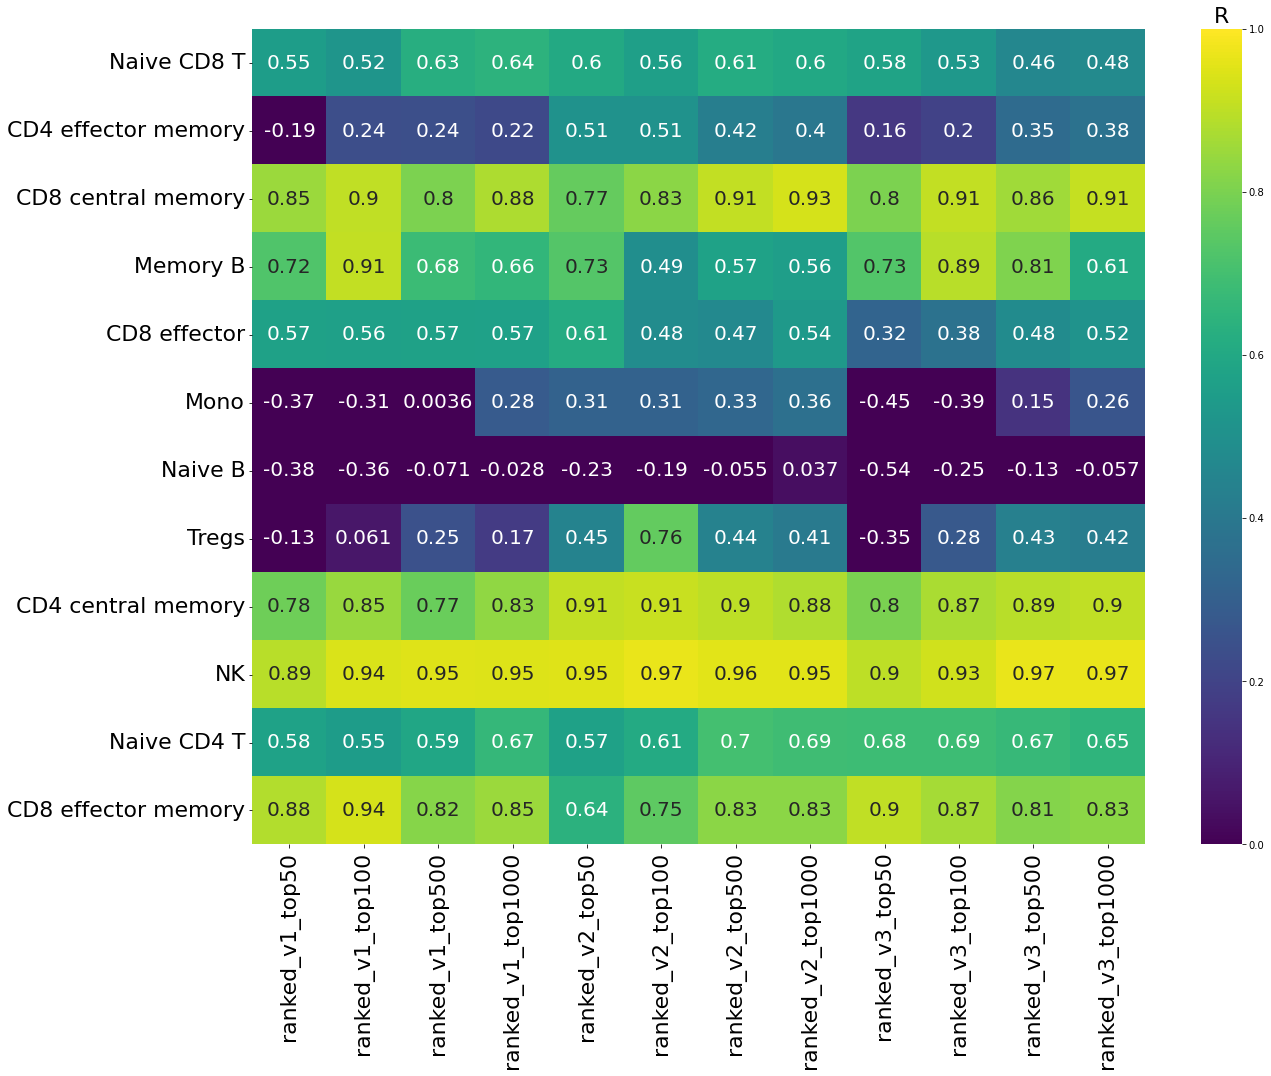

In [11]:
plt.figure(figsize=(20,15))
pearson_heatmap = sns.heatmap(df_pearson, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
pearson_heatmap.set_xticklabels(pearson_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
pearson_heatmap.set_yticklabels(pearson_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = pearson_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('R',fontsize = 22)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap.pdf', bbox_inches='tight')

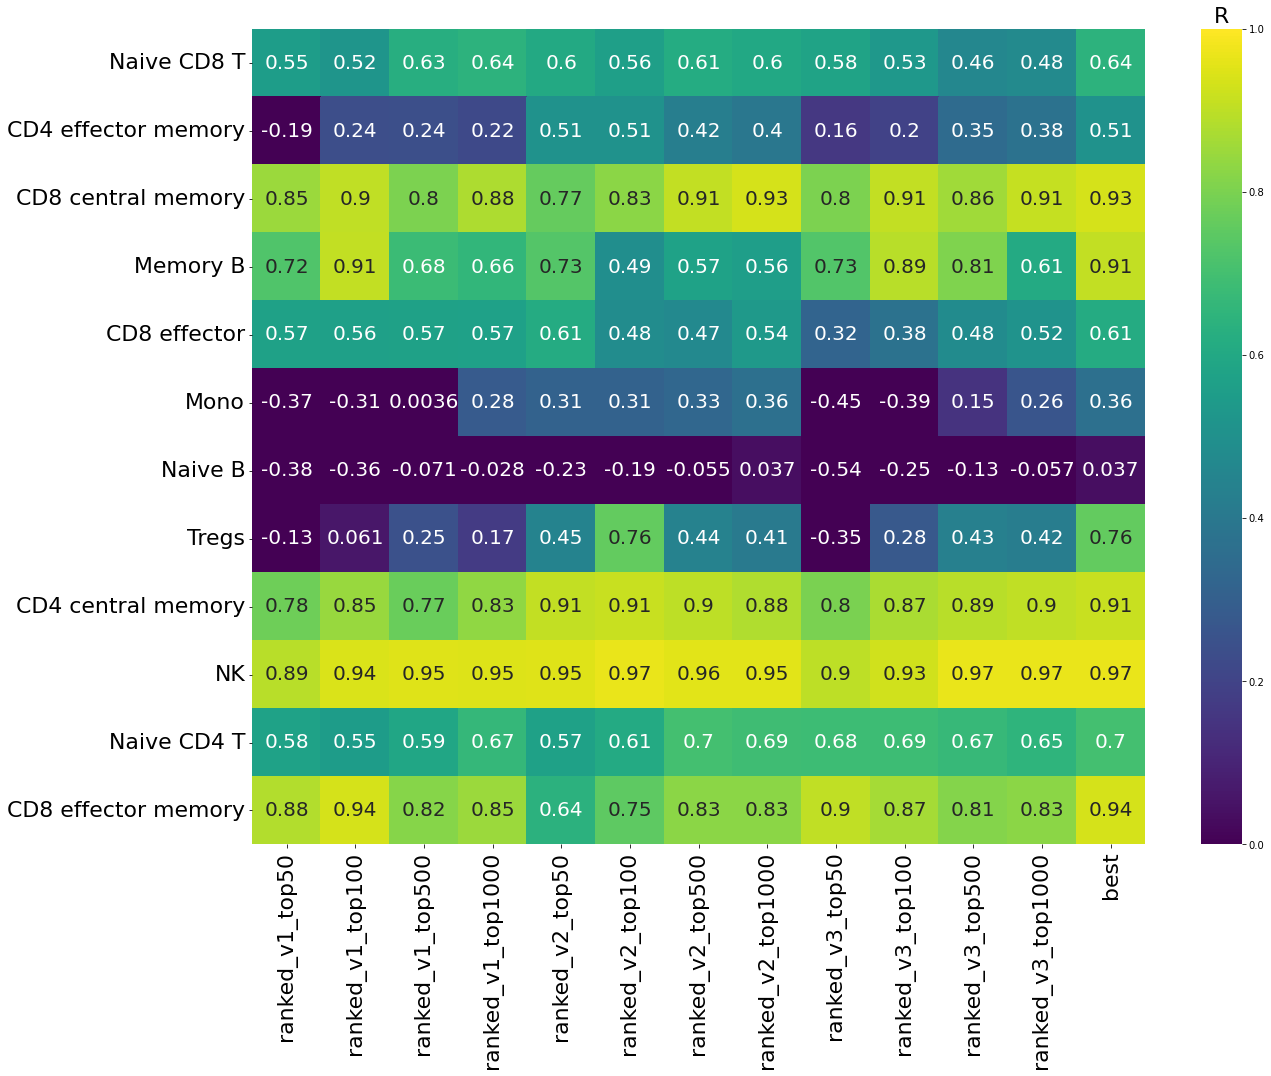

In [12]:
df_pearson_withbestcol=df_pearson.copy()
df_pearson_withbestcol['best']=df_pearson_withbestcol.max(axis=1)
df_pearson_withbestcol.to_csv(fol + '_pearson_correlation_withbest.txt', sep='\t')
plt.figure(figsize=(20,15))
pearson_heatmap = sns.heatmap(df_pearson_withbestcol, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
pearson_heatmap.set_xticklabels(pearson_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
pearson_heatmap.set_yticklabels(pearson_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = pearson_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('R',fontsize = 22)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap_withbestcol.pdf', bbox_inches='tight')

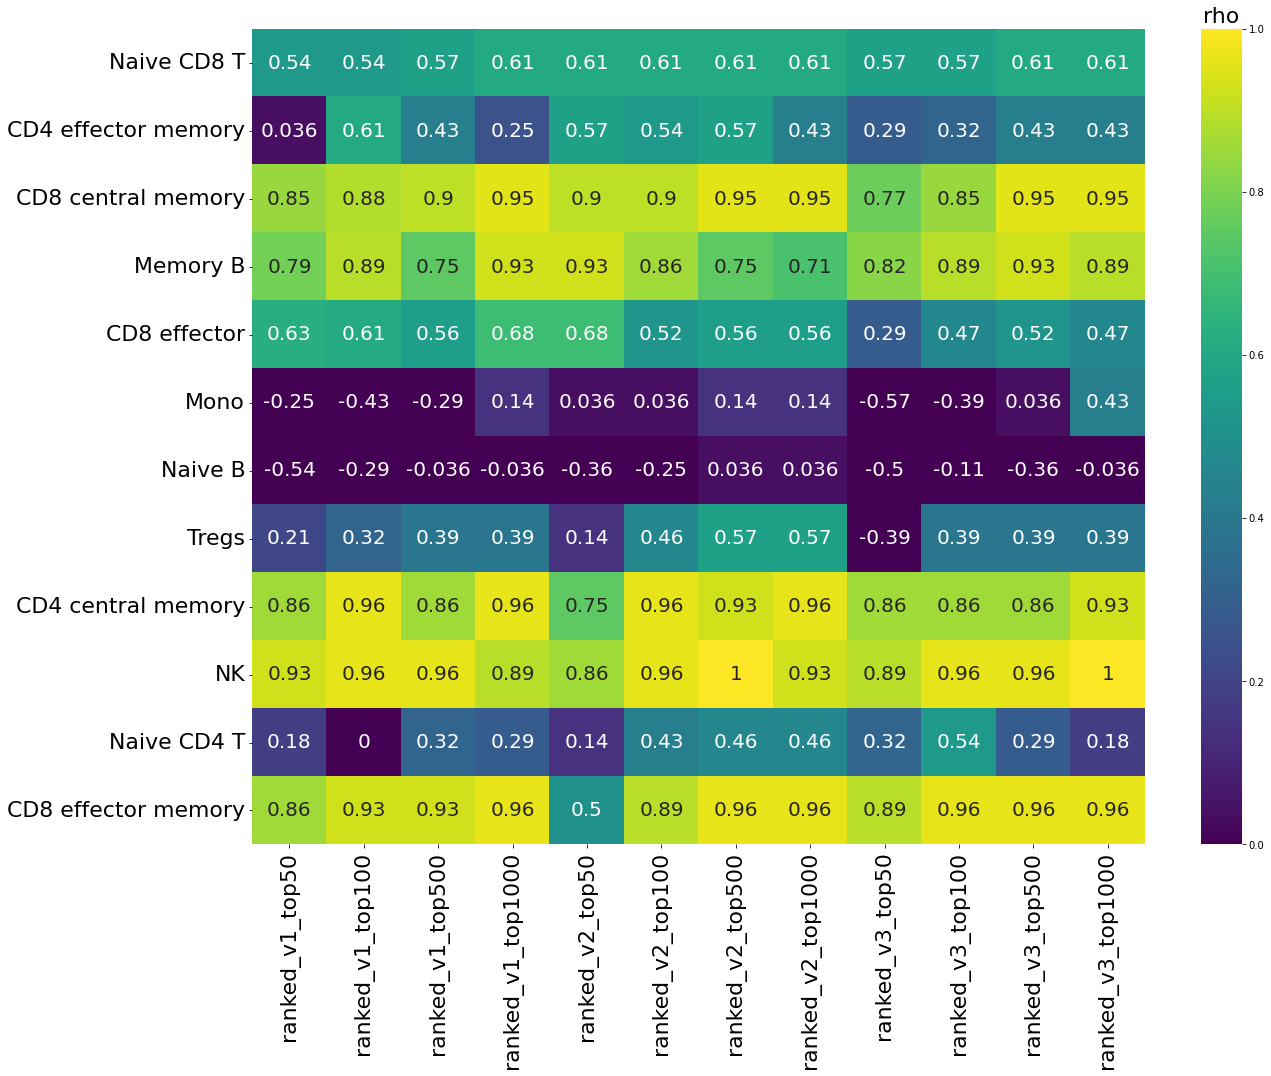

In [13]:
plt.figure(figsize=(20,15))
spearman_heatmap = sns.heatmap(df_spearman, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
spearman_heatmap.set_xticklabels(spearman_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
spearman_heatmap.set_yticklabels(spearman_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = spearman_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('rho',fontsize = 22)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap.pdf', bbox_inches='tight')

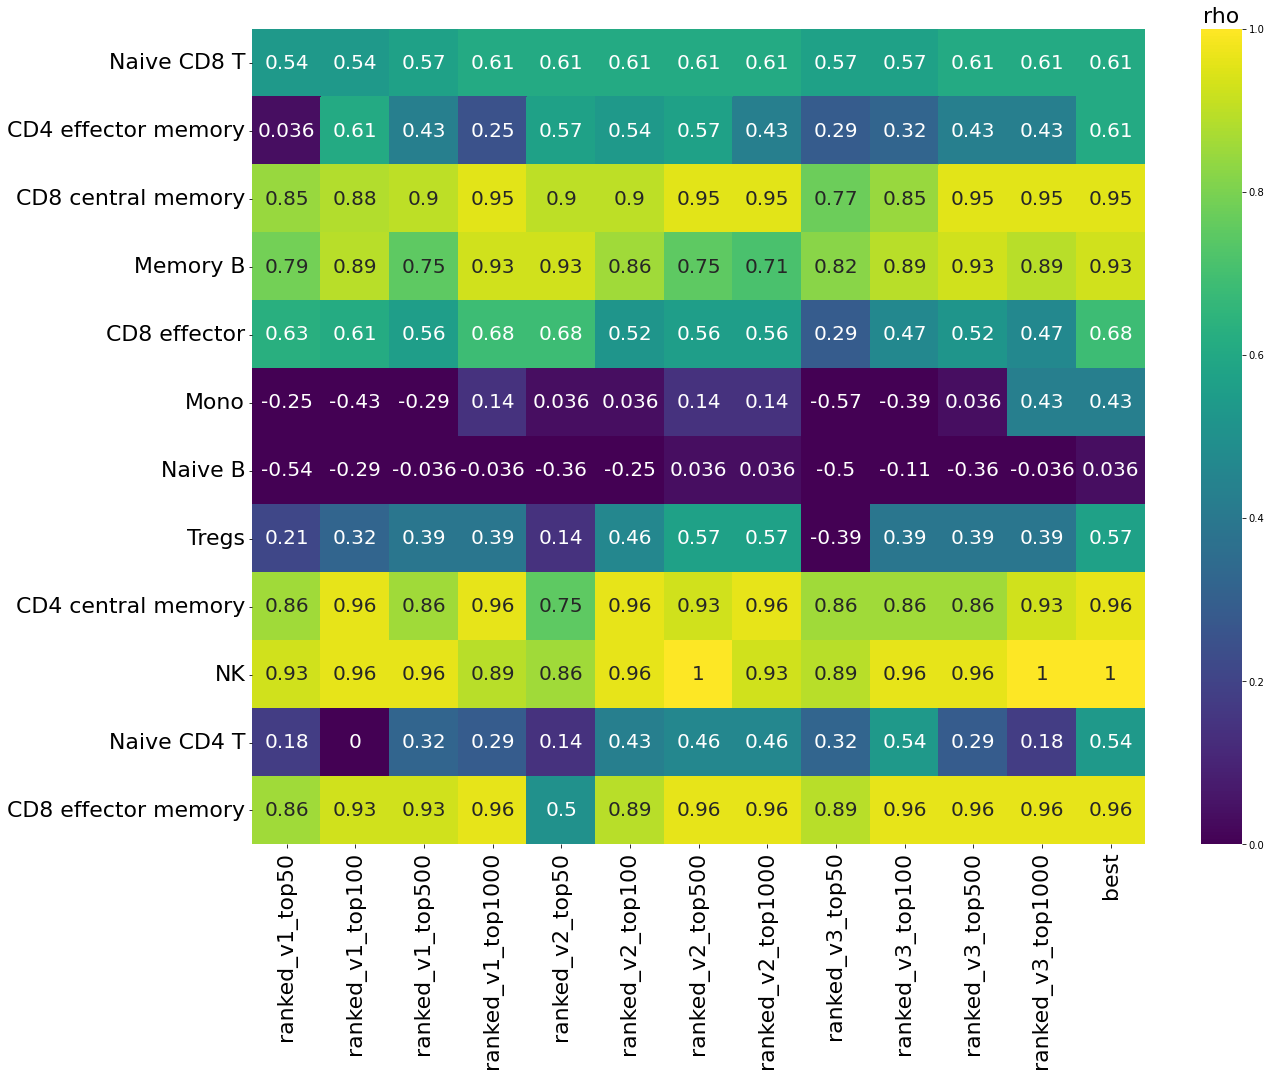

In [14]:
df_spearman_withbestcol=df_spearman.copy()
df_spearman_withbestcol['best']=df_spearman_withbestcol.max(axis=1)
df_spearman_withbestcol.to_csv(fol + '_spearman_correlation_withbest.txt', sep='\t')
plt.figure(figsize=(20,15))
spearman_heatmap = sns.heatmap(df_spearman_withbestcol, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
spearman_heatmap.set_xticklabels(spearman_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
spearman_heatmap.set_yticklabels(spearman_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = spearman_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('rho',fontsize = 22)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap_withbestcol.pdf', bbox_inches='tight')

In [15]:
df_pearson_mean=df_pearson.mean()
df_pearson_mean=df_pearson_mean.to_frame(name='Mean')
df_pearson_mean=df_pearson_mean.transpose()
df_pearson_mean

,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v3_top50,ranked_v3_top100,ranked_v3_top500,ranked_v3_top1000
Mean,0.396849,0.482836,0.51995,0.558092,0.56866,0.5824,0.59063,0.598779,0.37901,0.491851,0.561849,0.571988


In [16]:
df_pearson_median=df_pearson.median()
df_pearson_median=df_pearson_median.to_frame(name='Median')
df_pearson_median=df_pearson_median.transpose()
df_pearson_median

,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v3_top50,ranked_v3_top100,ranked_v3_top500,ranked_v3_top1000
Median,0.575597,0.556385,0.610009,0.650681,0.606814,0.583768,0.594069,0.579314,0.633091,0.610269,0.573926,0.561061


In [17]:
dfsummary=pd.concat([df_pearson_mean,df_pearson_median])
dfsummary=dfsummary[['ranked_v1_top50','ranked_v1_top100','ranked_v1_top500','ranked_v1_top1000','ranked_v2_top50','ranked_v2_top100','ranked_v2_top500','ranked_v2_top1000','ranked_v3_top50','ranked_v3_top100','ranked_v3_top500','ranked_v3_top1000']]

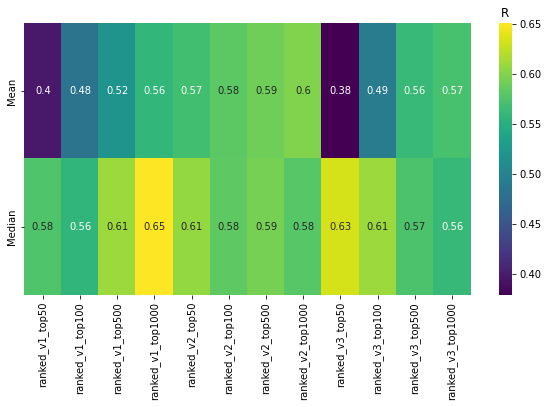

In [18]:
plt.figure(figsize=(10,5))
pearson_heatmap = sns.heatmap(dfsummary, cmap='viridis', annot=True)
cbar = pearson_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('R')
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap_summary.pdf', bbox_inches='tight')

In [19]:
df_spearman_mean=df_spearman.mean()
df_spearman_mean=df_spearman_mean.to_frame(name='Mean')
df_spearman_mean=df_spearman_mean.transpose()
df_spearman_mean

,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v3_top50,ranked_v3_top100,ranked_v3_top500,ranked_v3_top1000
Mean,0.423723,0.49963,0.529365,0.586047,0.480352,0.576957,0.629107,0.61125,0.353473,0.526281,0.548723,0.600766


In [20]:
df_spearman_median=df_spearman.median()
df_spearman_median=df_spearman_median.to_frame(name='Median')
df_spearman_median=df_spearman_median.transpose()
df_spearman_median

,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v3_top50,ranked_v3_top100,ranked_v3_top500,ranked_v3_top1000
Median,0.583185,0.60989,0.565005,0.645928,0.589286,0.571429,0.589286,0.589286,0.446429,0.553571,0.564843,0.537815


In [21]:
dfsummary=pd.concat([df_spearman_mean,df_spearman_median])
dfsummary=dfsummary[['ranked_v1_top50','ranked_v1_top100','ranked_v1_top500','ranked_v1_top1000','ranked_v2_top50','ranked_v2_top100','ranked_v2_top500','ranked_v2_top1000','ranked_v3_top50','ranked_v3_top100','ranked_v3_top500','ranked_v3_top1000']]
dfsummary

,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v3_top50,ranked_v3_top100,ranked_v3_top500,ranked_v3_top1000
Mean,0.423723,0.49963,0.529365,0.586047,0.480352,0.576957,0.629107,0.611250,0.353473,0.526281,0.548723,0.600766
Median,0.583185,0.60989,0.565005,0.645928,0.589286,0.571429,0.589286,0.589286,0.446429,0.553571,0.564843,0.537815


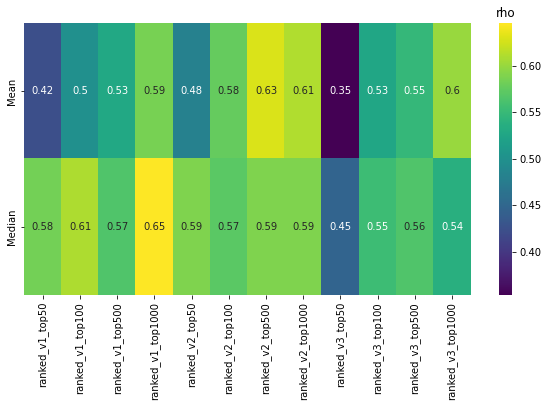

In [22]:
plt.figure(figsize=(10,5))
spearman_heatmap = sns.heatmap(dfsummary, cmap='viridis', annot=True)
cbar = spearman_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('rho')
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap_summary.pdf', bbox_inches='tight')